# Tweets {#sec-simchon-2023}

**Prerequisiti**

**Concetti e competenze chiave**

- Utilizzare Bambi per costruire e adattare modelli.
- Analizzare i risultati con Bambi.

**Preparazione del Notebook**

In [2]:
import os
import logging
import pandas as pd
import numpy as np
import seaborn as sns
import arviz as az
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
import cmdstanpy

cmdstanpy.utils.get_logger().setLevel(logging.ERROR)
from cmdstanpy import CmdStanModel
import bambi as bmb

In [3]:
seed: int = sum(map(ord, "simchon_2023"))
rng: np.random.Generator = np.random.default_rng(seed=seed)
sns.set_theme(palette="colorblind")
az.style.use("arviz-darkgrid")
%config InlineBackend.figure_format = "retina"

# Get the home directory
home_directory = os.path.expanduser("~")
# Construct the path to the Quarto project directory
project_directory = os.path.join(home_directory, "_repositories", "psicometria")

## Introduzione

Il rapporto tra linguaggio e pensiero è stato a lungo un argomento di grande interesse per studiosi e artisti. Una delle voci più influenti in questo dibattito è stata quella di George Orwell, che, attraverso il suo romanzo *1984*, ha rappresentato una distopia in cui un regime totalitario utilizza il linguaggio per limitare la capacità di pensiero della popolazione. In particolare, Orwell suggeriva nel suo saggio "Politics and the English Language" che alcune strutture linguistiche, come l'uso della forma passiva, possono facilitare ideologie oppressive, riducendo la percezione di agenzia dell'individuo.

Orwell osservava che le frasi in forma attiva e passiva, pur descrivendo la stessa azione, differiscono per l'enfasi posta sul soggetto dell'azione: la forma attiva lo evidenzia, mentre la forma passiva tende a nasconderlo o eliminarlo. Questo utilizzo del linguaggio non agentivo, secondo Orwell, potrebbe essere strumentalizzato per diminuire l'autonomia e il potere delle persone. Nonostante le sue critiche alla forma passiva, Orwell stesso ha revisionato le prime versioni di *1984* per includere numerose costruzioni passive, presumibilmente per enfatizzare l'idea di un mondo in cui gli individui non hanno controllo sulle proprie vite.

Oltre al suo utilizzo letterario, diversi studiosi sociali hanno sostenuto che l'uso del linguaggio passivo, e più in generale del linguaggio non agentivo, è strettamente correlato al livello di agenzia personale percepito. L'agenzia personale si riferisce alla capacità degli individui di esercitare il controllo sul mondo esterno e su se stessi, e si manifesta in tre aspetti principali: il controllo delle proprie azioni, il controllo dei risultati e delle risorse (come il potere sociale), e la percezione soggettiva di possedere questi controlli.

Studi psicologici precedenti hanno dimostrato che la formulazione linguistica può influenzare il livello di agenzia attribuito agli altri. Molti di questi studi si sono basati su analisi discorsive qualitative. In questo contesto, il presente studio si propone di esplorare se l'uso del linguaggio agentivo è un riflesso dell'agenzia personale degli individui. In particolare, si è esaminato se diversi fattori, come il potere sociale, il rango sociale e la partecipazione a un forum sulla depressione, influenzano l'uso della forma passiva.

Nel *Studio 3*, che qui verrà analizzato ulteriormente, @simchon2023computational hanno investigato se il linguaggio utilizzato in un forum dedicato alla depressione fosse caratterizzato da una maggiore frequenza di uso della forma passiva, ipotizzando che ciò fosse un riflesso della perdita di agenzia che molte persone con depressione sperimentano. La depressione è una condizione mentale debilitante associata a episodi ricorrenti di umore depresso, anedonia, bassa autostima e disperazione, spesso accompagnata da un senso di mancanza di controllo sugli eventi negativi della propria vita.

Nel contesto di comunità online, le persone che soffrono di depressione spesso cercano supporto emotivo e condivisione delle esperienze. Di conseguenza, @simchon2023computational hanno analizzato grandi dataset provenienti da Reddit per testare se i partecipanti a forum sulla depressione utilizzano la forma passiva più frequentemente rispetto a utenti di altre comunità. I risultati hanno mostrato che il linguaggio usato nel forum sulla depressione era significativamente meno agentivo rispetto a quello di altri forum, supportando l'ipotesi di una correlazione tra depressione e ridotta agentività linguistica.

Questi risultati non solo replicano la relazione tra l'uso di pronomi personali e depressione, ma suggeriscono anche che livelli inferiori di agenzia linguistica possono essere indicativi di una salute mentale deteriorata. Pertanto, comprendere come l'agenzia personale influenzi l'uso del linguaggio agentivo può fornire nuove prospettive sia per la ricerca psicologica sia per gli interventi clinici.


Qui ci concentreremo sull'analisi dell'Esperimento 3. La variabile dipendente è `passive_count`. Questa rappresenta il numero di verbi passivi utilizzati da ciascun partecipante. Essendo una variabile che corrisponde ad una frequenza assoluta (conteggio), il modello di regressione utilizzato dagli autori è una regressione binomiale negativa, che è adatta per i dati di conteggio con overdispersione (varianza maggiore della media). Il modello utilizzato dagli autori include le seguenti variabili indipendenti.

1. **`group`**: Questa è una variabile categorica che rappresenta il gruppo di appartenenza dei partecipanti. Esistonodue livelli per questa variabile: `control` (gruppo di controllo) e `dep` (gruppo con depressione). Questa variabile viene utilizzata per verificare se ci sono differenze nell'uso dei verbi passivi tra i due gruppi.

2. **`I_c`**: Questa è una variabile continua che rappresenta l'intensità dell'uso di un linguaggio autoreferenziale. Valori più alti indicano un uso maggiore.

3. **`wc_c`** è un'altra variabile continua,che sembra fornisce una misura della frequenza di parole in ciascun post. Viene utilizzata per controllare gli effetti del numero totale di parole prodotte dai partecipanti.

Nell'analisi considerata qui, `I_c` e `wc_c` sono state standardizzate. 

Il modello include anche l'interazione **`groupdep:I_c`**. L'interazione verifica se l'effetto del linguaggio autoreferenziale (`I_c`) sull'uso dei verbi passivi varia tra i gruppi (controllo vs. depressione). 

### Interpretazione dei risultati del modello

Il modello considerato ha la forma `passive_count ~ group * I_c + wc_c`. L'analisi bayesiana dei dati indica che:

- **Effetto principale di `groupdep`**: L'analisi suggerisce che, quando si controlla per il numero totale di parole (`wc_c`), il gruppo "dep" tende ad avere un conteggio più alto di verbi passivi rispetto al gruppo di controllo. Questo è supportato dalla distribuzione posteriore che mostra una maggiore concentrazione di valori positivi per il parametro associato a `groupdep`.

- **Effetto di `I_c`**: L'effetto di `I_c` (linguaggio autoreferenziale) sul conteggio dei verbi passivi, una volta controllato per `wc_c`, non appare chiaramente delineato. La distribuzione posteriore del parametro associato a `I_c` è centrata attorno a zero, suggerendo che non ci sono evidenze forti per un effetto positivo o negativo di `I_c`.

- **Effetto di `wc_c`**: Il numero totale di parole (`wc_c`) sembra avere un impatto consistente sul conteggio dei verbi passivi. La distribuzione posteriore del parametro associato a `wc_c` mostra una chiara concentrazione verso valori positivi, suggerendo che un maggiore numero di parole è associato a un maggiore uso di verbi passivi.

- **Interazione `groupdep:I_c`**: L'interazione tra `group` e `I_c` non mostra un effetto evidente sul conteggio dei verbi passivi quando si controlla per `wc_c`. La distribuzione posteriore del parametro dell'interazione è anch'essa centrata attorno a zero, indicando che non ci sono evidenze per un'interazione sostanziale tra il gruppo e il linguaggio autoreferenziale.

Questi risultati indicano che l'uso dei verbi passivi è influenzato da una combinazione di fattori, tra cui il gruppo di appartenenza e il numero totale di parole utilizzate. 

## BAyesian Model-Building Interface 

Leggiamo i dati utilizzati nel capitolo precedente.

In [4]:
data_file = os.path.join(project_directory, "data", "simchon_2023_study3a.csv")
d = pd.read_csv(data_file)

In [5]:
df = d[d["passive_count"] < 11]

# Rimuovi le colonne 'I_c' e 'wc_c'
df.drop(["I_c", "wc_c"], axis=1, inplace=True)

# Verifica il risultato
print(df.head())

       id group  passive_count  word_count  I_liwc
0  hzx393   dep              1          67       5
1  hzx265   dep              1         126      23
2  hzx1c8   dep              0         149      14
3  hzx0be   dep              1          74       4
4  hzwyua   dep              1          56       5


/var/folders/s7/z86r4t9j6yx376cm120nln6w0000gn/T/ipykernel_67831/3816525779.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["I_c", "wc_c"], axis=1, inplace=True)


In [6]:
from sklearn.preprocessing import StandardScaler

# Seleziona le colonne da standardizzare
columns_to_standardize = ["word_count", "I_liwc"]

# Crea un'istanza di StandardScaler
scaler = StandardScaler()

# Applica la standardizzazione solo sulle colonne selezionate
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# Rinomina la colonna 'I_liwc' a 'self_ref_lang'
df.rename(columns={
    "I_liwc": "I_c",
    "word_count": "wc_c"
    }, inplace=True)

# Verifica il risultato
print(df.head())

       id group  passive_count      wc_c       I_c
0  hzx393   dep              1 -0.524040 -0.549527
1  hzx265   dep              1 -0.203384  0.351386
2  hzx1c8   dep              0 -0.078382 -0.099071
3  hzx0be   dep              1 -0.485996 -0.599578
4  hzwyua   dep              1 -0.583824 -0.549527


/var/folders/s7/z86r4t9j6yx376cm120nln6w0000gn/T/ipykernel_67831/2844295889.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])
/var/folders/s7/z86r4t9j6yx376cm120nln6w0000gn/T/ipykernel_67831/2844295889.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={


In [27]:
# Define the model using Bambi
model = bmb.Model("passive_count ~ group * I_c + wc_c", data=df, family="negativebinomial")

Sul lato sinistro della tilde (∼), abbiamo la variabile dipendente, e sul lato destro, le variabili indipendenti. Con questa sintassi, stiamo semplicemente specificando la media (μ nel modello lm di PyMC). Per impostazione predefinita, Bambi assume che la verosimiglianza sia gaussiana; è possibile modificarla con l'argomento `family`. La sintassi della formula non specifica la distribuzione delle priors, ma solo come sono associate le variabili dipendenti e indipendenti. Bambi definirà automaticamente delle priors (molto) debolmente informative per noi. Possiamo ottenere ulteriori informazioni stampando il modello Bambi.

In [13]:
print(model)

       Formula: passive_count ~ group * I_c + wc_c
        Family: negativebinomial
          Link: mu = log
  Observations: 8645
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 4.2886)
            group ~ Normal(mu: 0.0, sigma: 5.2627)
            I_c ~ Normal(mu: 0.0, sigma: 2.5)
            group:I_c ~ Normal(mu: 0.0, sigma: 2.8047)
            wc_c ~ Normal(mu: 0.0, sigma: 2.5)
        
        Auxiliary parameters
            alpha ~ HalfCauchy(beta: 1.0)


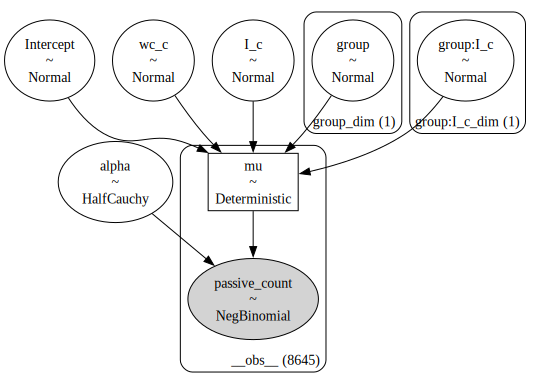

In [14]:
model.build()
model.graph()

Se vogliamo procedere con un'ispezione visiva dei prior dei parametri del modello usiamo:

Eseguiamo il campionamento MCMC.

In [28]:
trace = model.fit(
    tune=2000,
    draws=1000,
    nuts_sampler="numpyro",
    idata_kwargs={"log_likelihood": True}
)

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

In [16]:
az.summary(trace, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
I_c,-0.07,0.05,-0.16,0.03,0.0,0.0,1778.50,1930.11,1.0
Intercept,-0.39,0.03,-0.45,-0.32,0.0,0.0,2320.60,2365.65,1.0
alpha,2.10,0.10,1.91,2.28,0.0,0.0,2987.03,2463.13,1.0
group[dep],0.21,0.04,0.13,0.28,0.0,0.0,2508.87,2688.34,1.0
group:I_c[dep],-0.05,0.05,-0.14,0.03,0.0,0.0,2053.27,2463.19,1.0
wc_c,0.76,0.03,0.70,0.81,0.0,0.0,2611.69,2458.39,1.0


Il modello specificato è:

\[
\text{passive\_count} \sim \text{group} * I_c + wc_c
\]

con una distribuzione binomiale negativa. Questo modello ha lo scopo di prevedere il `passive_count` (il numero di verbi ausiliari passivi usati dai partecipanti) in base a:

- **group**: Una variabile categorica che indica il gruppo di appartenenza dei partecipanti (ad esempio, controllo vs. depressione, rappresentato qui come `group[dep]`).
- **I_c**: Una variabile continua che rappresenta il linguaggio autoreferenziale.
- **wc_c**: Una variabile continua che rappresenta il conteggio delle parole, centrata.
- **group:I_c**: Un termine di interazione tra `group` e `I_c`, che indica come la relazione tra `I_c` e `passive_count` varia tra i gruppi.

La distribuzione binomiale negativa è scelta perché `passive_count` è una variabile di conteggio, e questa distribuzione è appropriata quando i dati mostrano sovradispersione (cioè, la varianza è maggiore della media).

### Interpretazione dei Coefficienti

I coefficienti del modello di regressione sono riassunti con la loro media a posteriori, deviazione standard (sd), intervallo ad alta densità (HDI) al 3% e 97%, errore standard Monte Carlo della media (mcse_mean), errore standard Monte Carlo della deviazione standard (mcse_sd), dimensione campionaria efficace per il bulk (ess_bulk), dimensione campionaria efficace per la coda (ess_tail) e statistica R-hat (r_hat).

Ecco cosa rappresenta ciascun coefficiente e come interpretarli:

1. **Intercetta** (`Intercept`):

   - **Media**: -0.39
   - **Interpretazione**: L'intercetta rappresenta il logaritmo del conteggio atteso di verbi ausiliari passivi (`passive_count`) quando tutte le variabili predittive (`group[dep]`, `I_c`, `wc_c`, e `group:I_c[dep]`) sono pari a zero. Poiché questo valore è su scala logaritmica (a causa della funzione di collegamento logaritmica del modello binomiale negativo), un valore di -0.39 indica un conteggio logaritmico di base che corrisponde a exp(-0.39) in termini di conteggi reali.
   - **HDI 3% a 97%**: L'intervallo [-0.45, -0.32] suggerisce che c'è il 94% di probabilità che il vero valore dell'intercetta si trovi in questo intervallo.

2. **Linguaggio Autoreferenziale** (`I_c`):

   - **Media**: -0.07
   - **Interpretazione**: Questo coefficiente indica che, per ogni aumento di una unità in `I_c` (linguaggio autoreferenziale), il logaritmo del conteggio atteso dei verbi ausiliari passivi diminuisce di 0.07 unità, mantenendo costanti le altre variabili. Questo suggerisce una relazione leggermente negativa, ma l'intervallo HDI dal 3% al 97% (-0.16, 0.03) indica incertezza sul fatto che questo effetto sia effettivamente diverso da zero.

3. **Effetto del Gruppo** (`group[dep]`):

   - **Media**: 0.21
   - **Interpretazione**: Questo coefficiente indica che, per i partecipanti nel gruppo "dep" (gruppo depressione), il logaritmo del conteggio atteso dei verbi ausiliari passivi è superiore di 0.21 unità rispetto ai partecipanti nel gruppo di riferimento (ad esempio, controllo), mantenendo costanti le altre variabili. Questo valore positivo suggerisce che il gruppo depressione tende a utilizzare più verbi ausiliari passivi rispetto al gruppo di controllo.
   - **HDI 3% a 97%**: L'intervallo [0.13, 0.28] mostra una forte certezza che l'effetto è positivo.

4. **Interazione tra Gruppo e Linguaggio Autoreferenziale** (`group:I_c[dep]`):

   - **Media**: -0.05
   - **Interpretazione**: Questo coefficiente rappresenta come l'effetto del linguaggio autoreferenziale (`I_c`) sul logaritmo del conteggio dei verbi ausiliari passivi differisce per il gruppo "dep" rispetto al gruppo di riferimento. Una media di -0.05 suggerisce che nel gruppo "dep", la relazione tra `I_c` e `passive_count` è leggermente negativa rispetto al gruppo di controllo. Tuttavia, poiché l'intervallo HDI dal 3% al 97% (-0.14, 0.03) include zero, non c'è una chiara evidenza di un effetto differenziale significativo.

5. **Conteggio delle Parole** (`wc_c`):

   - **Media**: 0.76
   - **Interpretazione**: Questo coefficiente indica che, per ogni aumento di una unità nel conteggio delle parole centrato (`wc_c`), il logaritmo del conteggio atteso dei verbi ausiliari passivi aumenta di 0.76 unità, mantenendo costanti le altre variabili. Ciò suggerisce che un maggiore numero di parole è associato a un maggiore uso di verbi ausiliari passivi.
   - **HDI 3% a 97%**: L'intervallo [0.70, 0.81] indica che c'è una forte evidenza di un effetto positivo del conteggio delle parole.

6. **Parametro di Dispersione** (`alpha`):

   - **Media**: 2.10
   - **Interpretazione**: Il parametro `alpha` rappresenta la dispersione del modello binomiale negativo. Un valore di `alpha` maggiore di 1 indica che i dati mostrano sovradispersione, ovvero la varianza è maggiore della media, il che è tipico dei modelli di conteggio.

### Conclusione

In sintesi, questo modello suggerisce che il gruppo di appartenenza (dep vs. controllo) e il conteggio delle parole hanno effetti evidenti sul numero di verbi ausiliari passivi utilizzati. L'effetto del linguaggio autoreferenziale e della sua interazione con il gruppo è meno chiaro, suggerendo una necessità di ulteriore esplorazione o considerazione di altri fattori.

/var/folders/s7/z86r4t9j6yx376cm120nln6w0000gn/T/ipykernel_63000/1234253612.py:73: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f"{x:.2f}" for x in xticks])
/var/folders/s7/z86r4t9j6yx376cm120nln6w0000gn/T/ipykernel_63000/1234253612.py:75: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


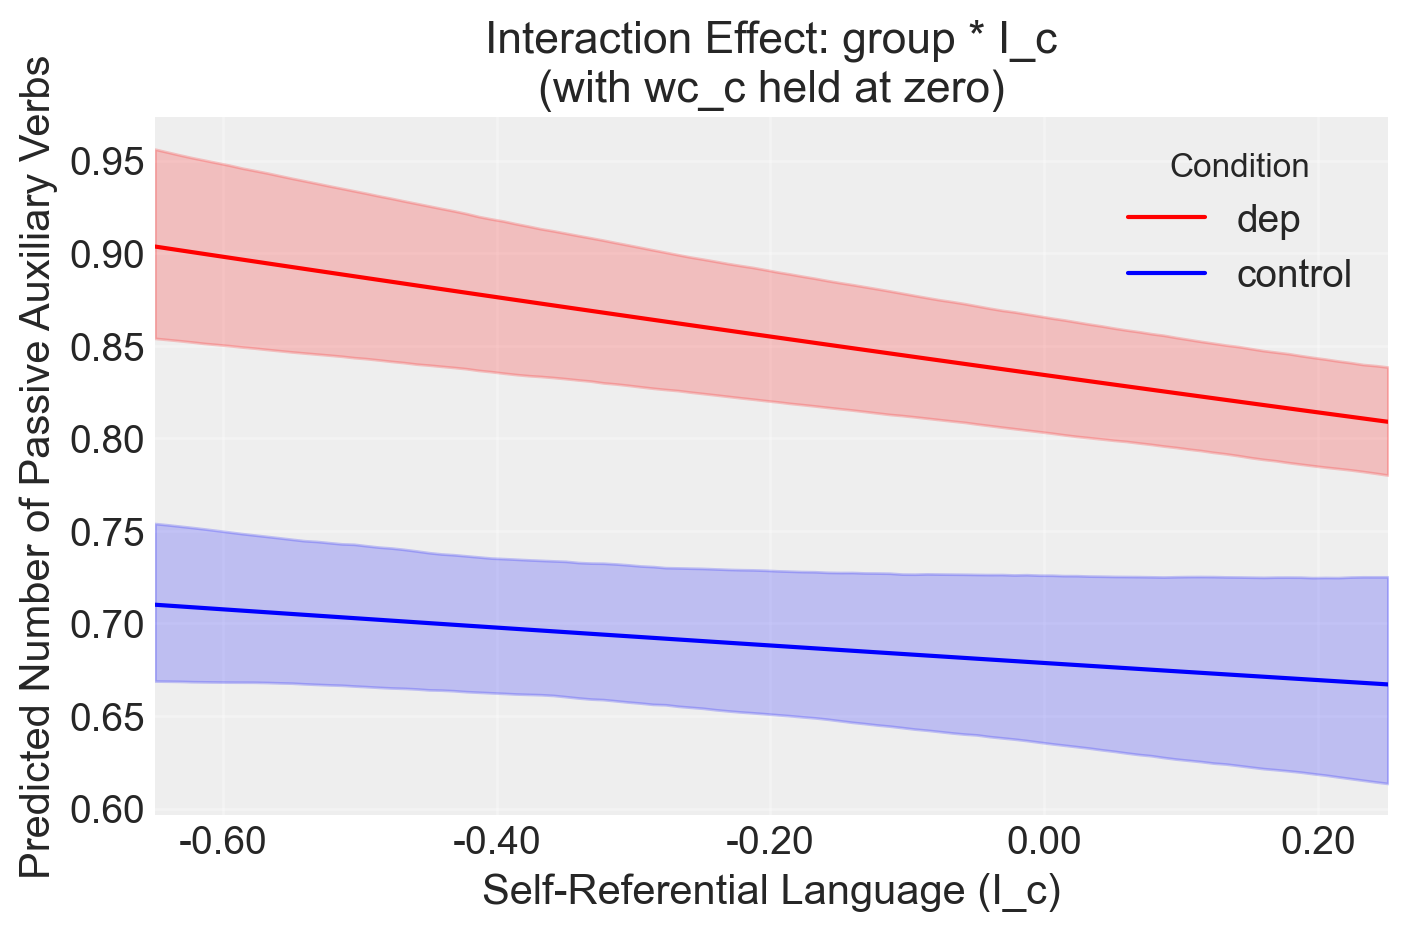

In [18]:
# Extract posterior samples
posterior = az.extract(trace)

# Create a grid of I_c values (using IQR as in your R code)
I_c_q1, I_c_q3 = np.percentile(df["I_c"], [25, 75])
I_c_values = np.linspace(I_c_q1, I_c_q3, 100)

# Get unique groups
groups = df["group"].unique()

# Ensure 'dep' is treated as the non-reference group
is_dep_reference = groups[0] == "dep"


# Helper function to safely get posterior values
def get_posterior_values(posterior, key):
    values = posterior[key].values  # Convert DataArray to NumPy array
    if values.ndim == 3:
        values = values.squeeze(axis=1)  # Remove the singleton dimension
    return values


# Calculate posterior predictions
posterior_preds = {}

for group in groups:
    # Create design matrix
    X = pd.DataFrame(
        {
            "Intercept": 1,
            "group": (group == "dep") if is_dep_reference else (group != "dep"),
            "I_c": I_c_values,
            "wc_c": 0,  # Set to 0 as per zero_it in your R code
            "group:I_c": ((group == "dep") if is_dep_reference else (group != "dep"))
            * I_c_values,
        }
    )

    # Safely reshape group-related posteriors
    group_values = get_posterior_values(posterior, "group").flatten()
    group_I_c_values = get_posterior_values(posterior, "group:I_c").flatten()

    # Calculate linear predictor
    linear_pred = (
        get_posterior_values(posterior, "Intercept")[:, np.newaxis]
        + group_values[:, np.newaxis] * X["group"].values
        + get_posterior_values(posterior, "I_c")[:, np.newaxis] * X["I_c"].values
        + get_posterior_values(posterior, "wc_c")[:, np.newaxis] * X["wc_c"].values
        + group_I_c_values[:, np.newaxis] * X["group:I_c"].values
    )

    # Transform to response scale
    posterior_preds[group] = np.exp(linear_pred)

# Plot
colors = {"control": "blue", "dep": "red"}

for group, preds in posterior_preds.items():
    mean = preds.mean(axis=0)
    ci = np.percentile(preds, [2.5, 97.5], axis=0)
    plt.plot(I_c_values, mean, label=group, color=colors[group])
    plt.fill_between(I_c_values, ci[0], ci[1], alpha=0.2, color=colors[group])

plt.xlabel("Self-Referential Language (I_c)")
plt.ylabel("Predicted Number of Passive Auxiliary Verbs")
plt.title("Interaction Effect: group * I_c\n(with wc_c held at zero)")
plt.legend(title="Condition")
plt.grid(True, alpha=0.3)

# Adjust x-axis to show more interpretable values
plt.xlim(I_c_q1, I_c_q3)
xticks = plt.gca().get_xticks()
plt.gca().set_xticklabels([f"{x:.2f}" for x in xticks])

plt.tight_layout()
plt.show()

In [13]:
model2 = bmb.Model(
    "passive_count ~ group * I_c + wc_c", data=df, family="poisson"
)

In [14]:
trace2 = model2.fit(
    tune=2000, draws=1000, nuts_sampler="numpyro", idata_kwargs={"log_likelihood": True}
)

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

In [15]:
az.summary(trace2, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
I_c,-0.09,0.02,-0.14,-0.05,0.0,0.0,2012.27,2012.51,1.0
Intercept,-0.35,0.02,-0.39,-0.31,0.0,0.0,2527.49,2424.84,1.0
group[dep],0.30,0.03,0.25,0.35,0.0,0.0,2801.92,2775.68,1.0
group:I_c[dep],0.01,0.02,-0.03,0.04,0.0,0.0,2428.61,2259.45,1.0
wc_c,0.46,0.01,0.44,0.49,0.0,0.0,2376.84,2675.49,1.0


/var/folders/s7/z86r4t9j6yx376cm120nln6w0000gn/T/ipykernel_67831/4242554425.py:73: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f"{x:.2f}" for x in xticks])
/var/folders/s7/z86r4t9j6yx376cm120nln6w0000gn/T/ipykernel_67831/4242554425.py:75: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


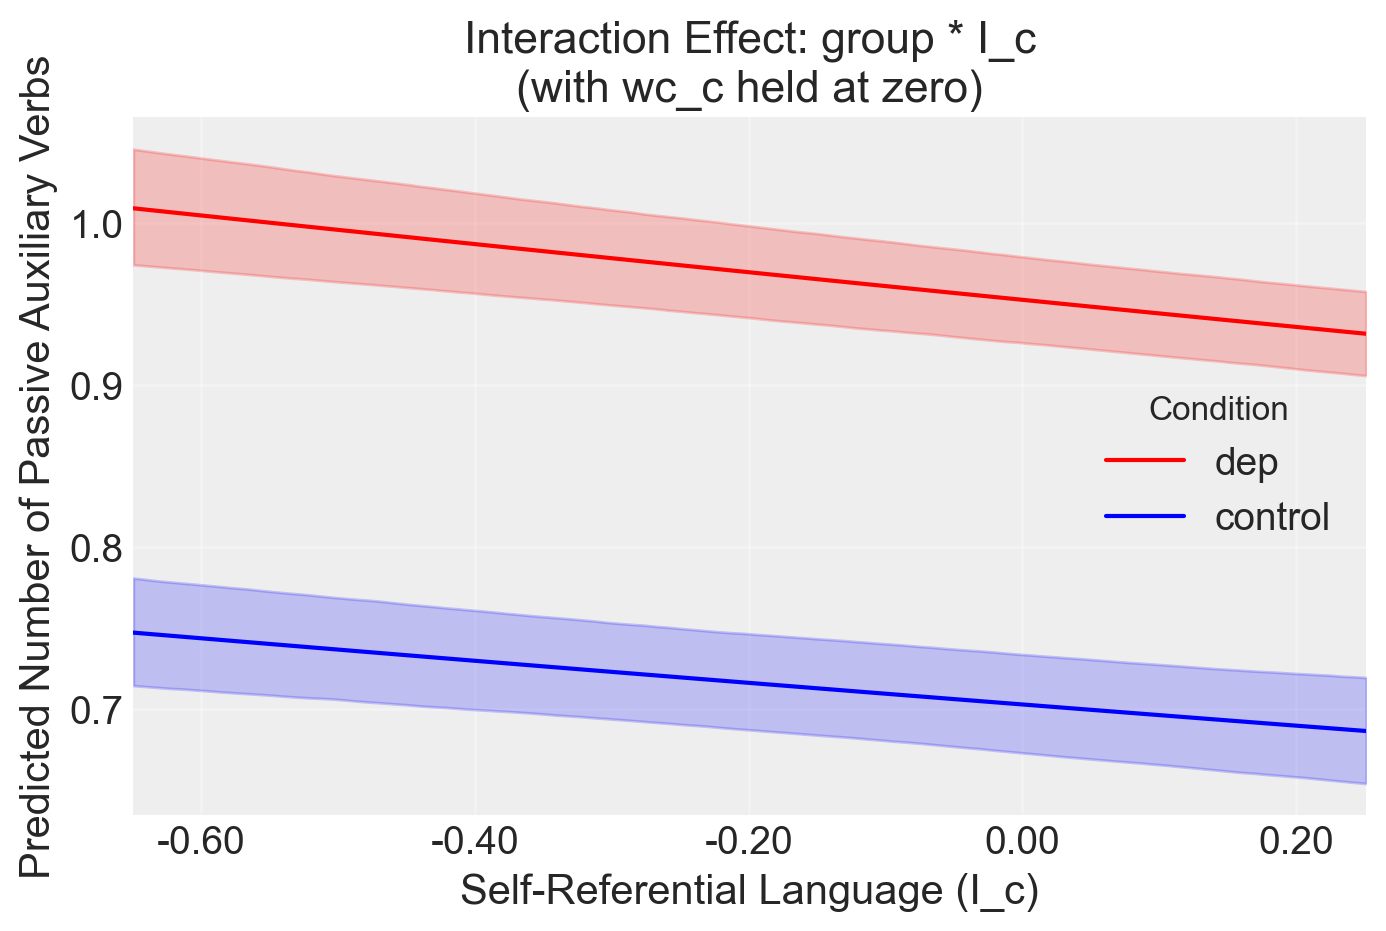

In [16]:
# Extract posterior samples
posterior = az.extract(trace2)

# Create a grid of I_c values (using IQR as in your R code)
I_c_q1, I_c_q3 = np.percentile(df["I_c"], [25, 75])
I_c_values = np.linspace(I_c_q1, I_c_q3, 100)

# Get unique groups
groups = df["group"].unique()

# Ensure 'dep' is treated as the non-reference group
is_dep_reference = groups[0] == "dep"


# Helper function to safely get posterior values
def get_posterior_values(posterior, key):
    values = posterior[key].values  # Convert DataArray to NumPy array
    if values.ndim == 3:
        values = values.squeeze(axis=1)  # Remove the singleton dimension
    return values


# Calculate posterior predictions
posterior_preds = {}

for group in groups:
    # Create design matrix
    X = pd.DataFrame(
        {
            "Intercept": 1,
            "group": (group == "dep") if is_dep_reference else (group != "dep"),
            "I_c": I_c_values,
            "wc_c": 0,  # Set to 0 as per zero_it in your R code
            "group:I_c": ((group == "dep") if is_dep_reference else (group != "dep"))
            * I_c_values,
        }
    )

    # Safely reshape group-related posteriors
    group_values = get_posterior_values(posterior, "group").flatten()
    group_I_c_values = get_posterior_values(posterior, "group:I_c").flatten()

    # Calculate linear predictor
    linear_pred = (
        get_posterior_values(posterior, "Intercept")[:, np.newaxis]
        + group_values[:, np.newaxis] * X["group"].values
        + get_posterior_values(posterior, "I_c")[:, np.newaxis] * X["I_c"].values
        + get_posterior_values(posterior, "wc_c")[:, np.newaxis] * X["wc_c"].values
        + group_I_c_values[:, np.newaxis] * X["group:I_c"].values
    )

    # Transform to response scale
    posterior_preds[group] = np.exp(linear_pred)

# Plot
colors = {"control": "blue", "dep": "red"}

for group, preds in posterior_preds.items():
    mean = preds.mean(axis=0)
    ci = np.percentile(preds, [2.5, 97.5], axis=0)
    plt.plot(I_c_values, mean, label=group, color=colors[group])
    plt.fill_between(I_c_values, ci[0], ci[1], alpha=0.2, color=colors[group])

plt.xlabel("Self-Referential Language (I_c)")
plt.ylabel("Predicted Number of Passive Auxiliary Verbs")
plt.title("Interaction Effect: group * I_c\n(with wc_c held at zero)")
plt.legend(title="Condition")
plt.grid(True, alpha=0.3)

# Adjust x-axis to show more interpretable values
plt.xlim(I_c_q1, I_c_q3)
xticks = plt.gca().get_xticks()
plt.gca().set_xticklabels([f"{x:.2f}" for x in xticks])

plt.tight_layout()
plt.show()

In [25]:
model2.predict(trace2, kind="response")

<Axes: xlabel='passive_count'>

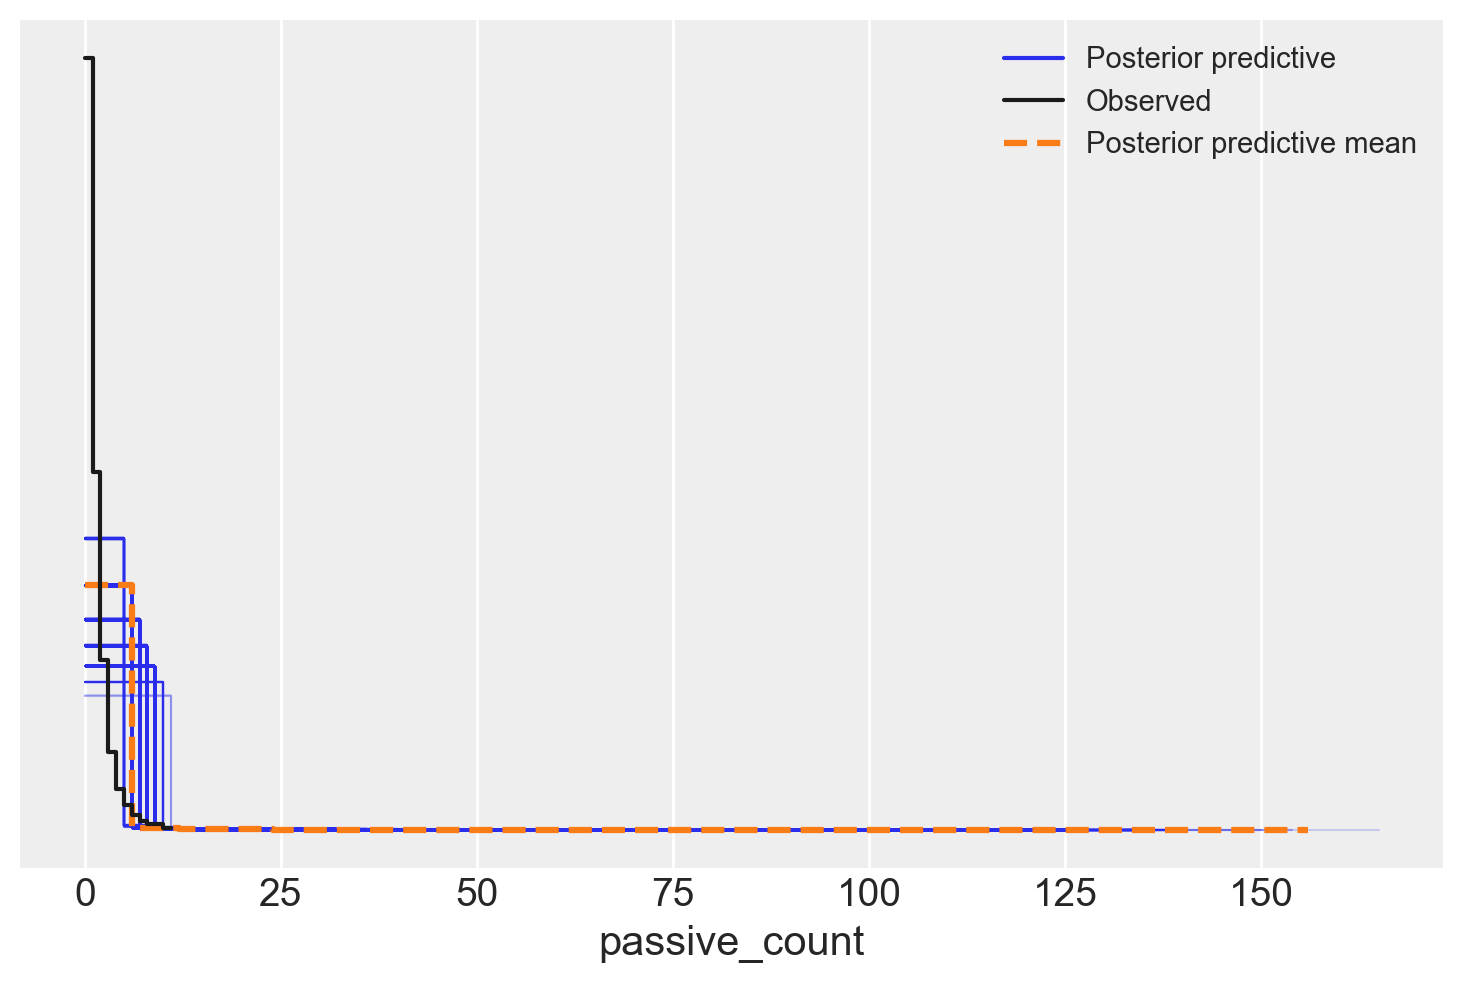

In [26]:
az.plot_ppc(trace2)

In [29]:
model.predict(trace, kind="response")

<Axes: xlabel='passive_count'>

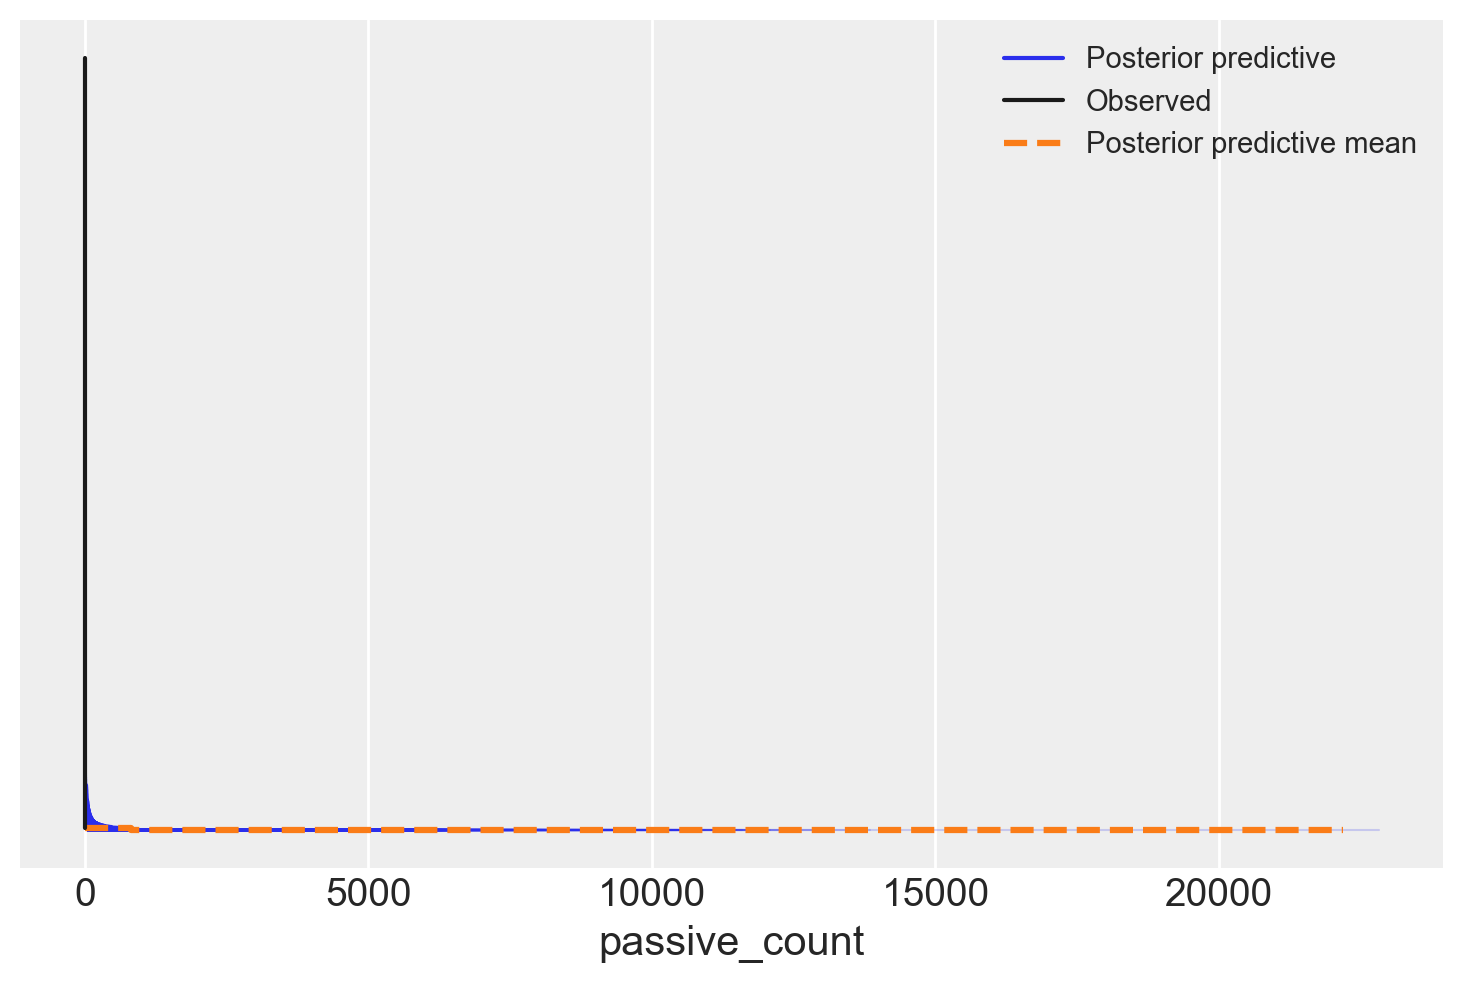

In [30]:
az.plot_ppc(trace)

In [37]:
# Compute LOO
loo_result = az.loo(trace)

# Print the LOO and ELPD results
print(loo_result)

Computed from 4000 posterior samples and 8645 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -10494.67    93.09
p_loo        8.27        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)     8645  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%



In [38]:
# Compute LOO
loo2_result = az.loo(trace2)

# Print the LOO and ELPD results
print(loo2_result)

/opt/anaconda3/envs/cmdstan_env/lib/python3.12/site-packages/arviz/stats/stats.py:789: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


Computed from 4000 posterior samples and 8645 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -11267.62   148.51
p_loo       54.61        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)     8643  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    2    0.0%



In [39]:
df_comp_loo = az.compare({"neg_bin_model": loo_result, "poisson _model": loo2_result})
df_comp_loo

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
neg_bin_model,0,-10494.665380,8.268416,0.000000,0.95484,93.094047,0.000000,False,log
poisson _model,1,-11267.624222,54.610578,772.958842,0.04516,148.505078,96.512308,True,log


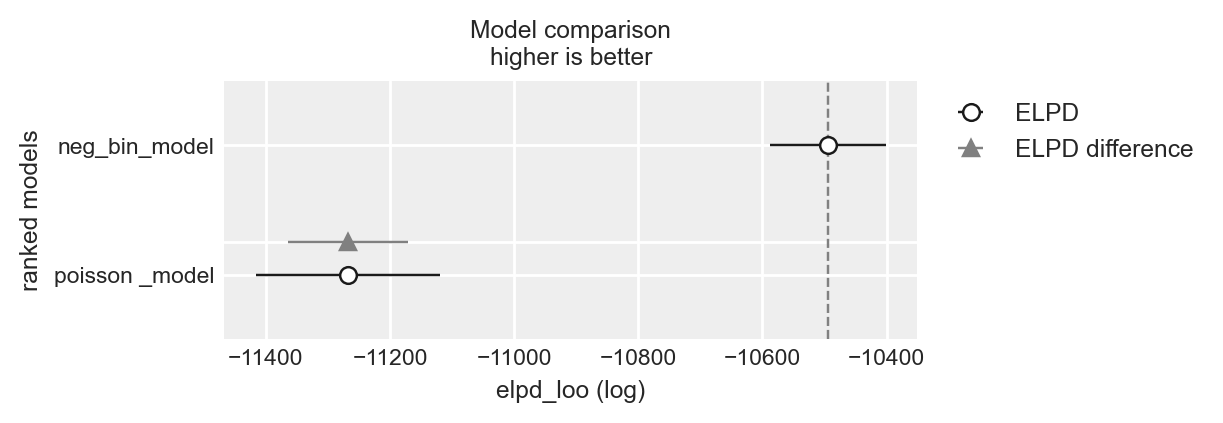

In [40]:
_ = az.plot_compare(df_comp_loo, insample_dev=False)

## Informazioni sull'Ambiente di Sviluppo

In [19]:
%load_ext watermark
%watermark -n -u -v -iv -w -m 

Last updated: Wed Aug 14 2024

Python implementation: CPython
Python version       : 3.12.4
IPython version      : 8.26.0

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.6.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

seaborn   : 0.13.2
cmdstanpy : 1.2.4
arviz     : 0.18.0
matplotlib: 3.9.1
pandas    : 2.2.2
numpy     : 1.26.4
logging   : 0.5.1.2
bambi     : 0.14.0

Watermark: 2.4.3

